In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
import io
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
dia=pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('husl')

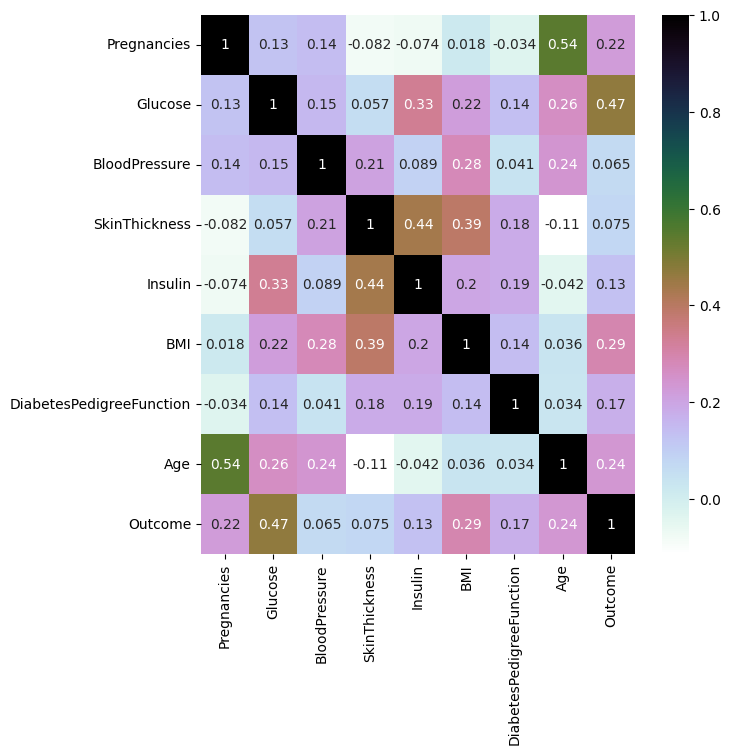

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(dia.corr(),annot=True,cmap="cubehelix_r")
plt.show()

There isn't a notable correlation among the variables

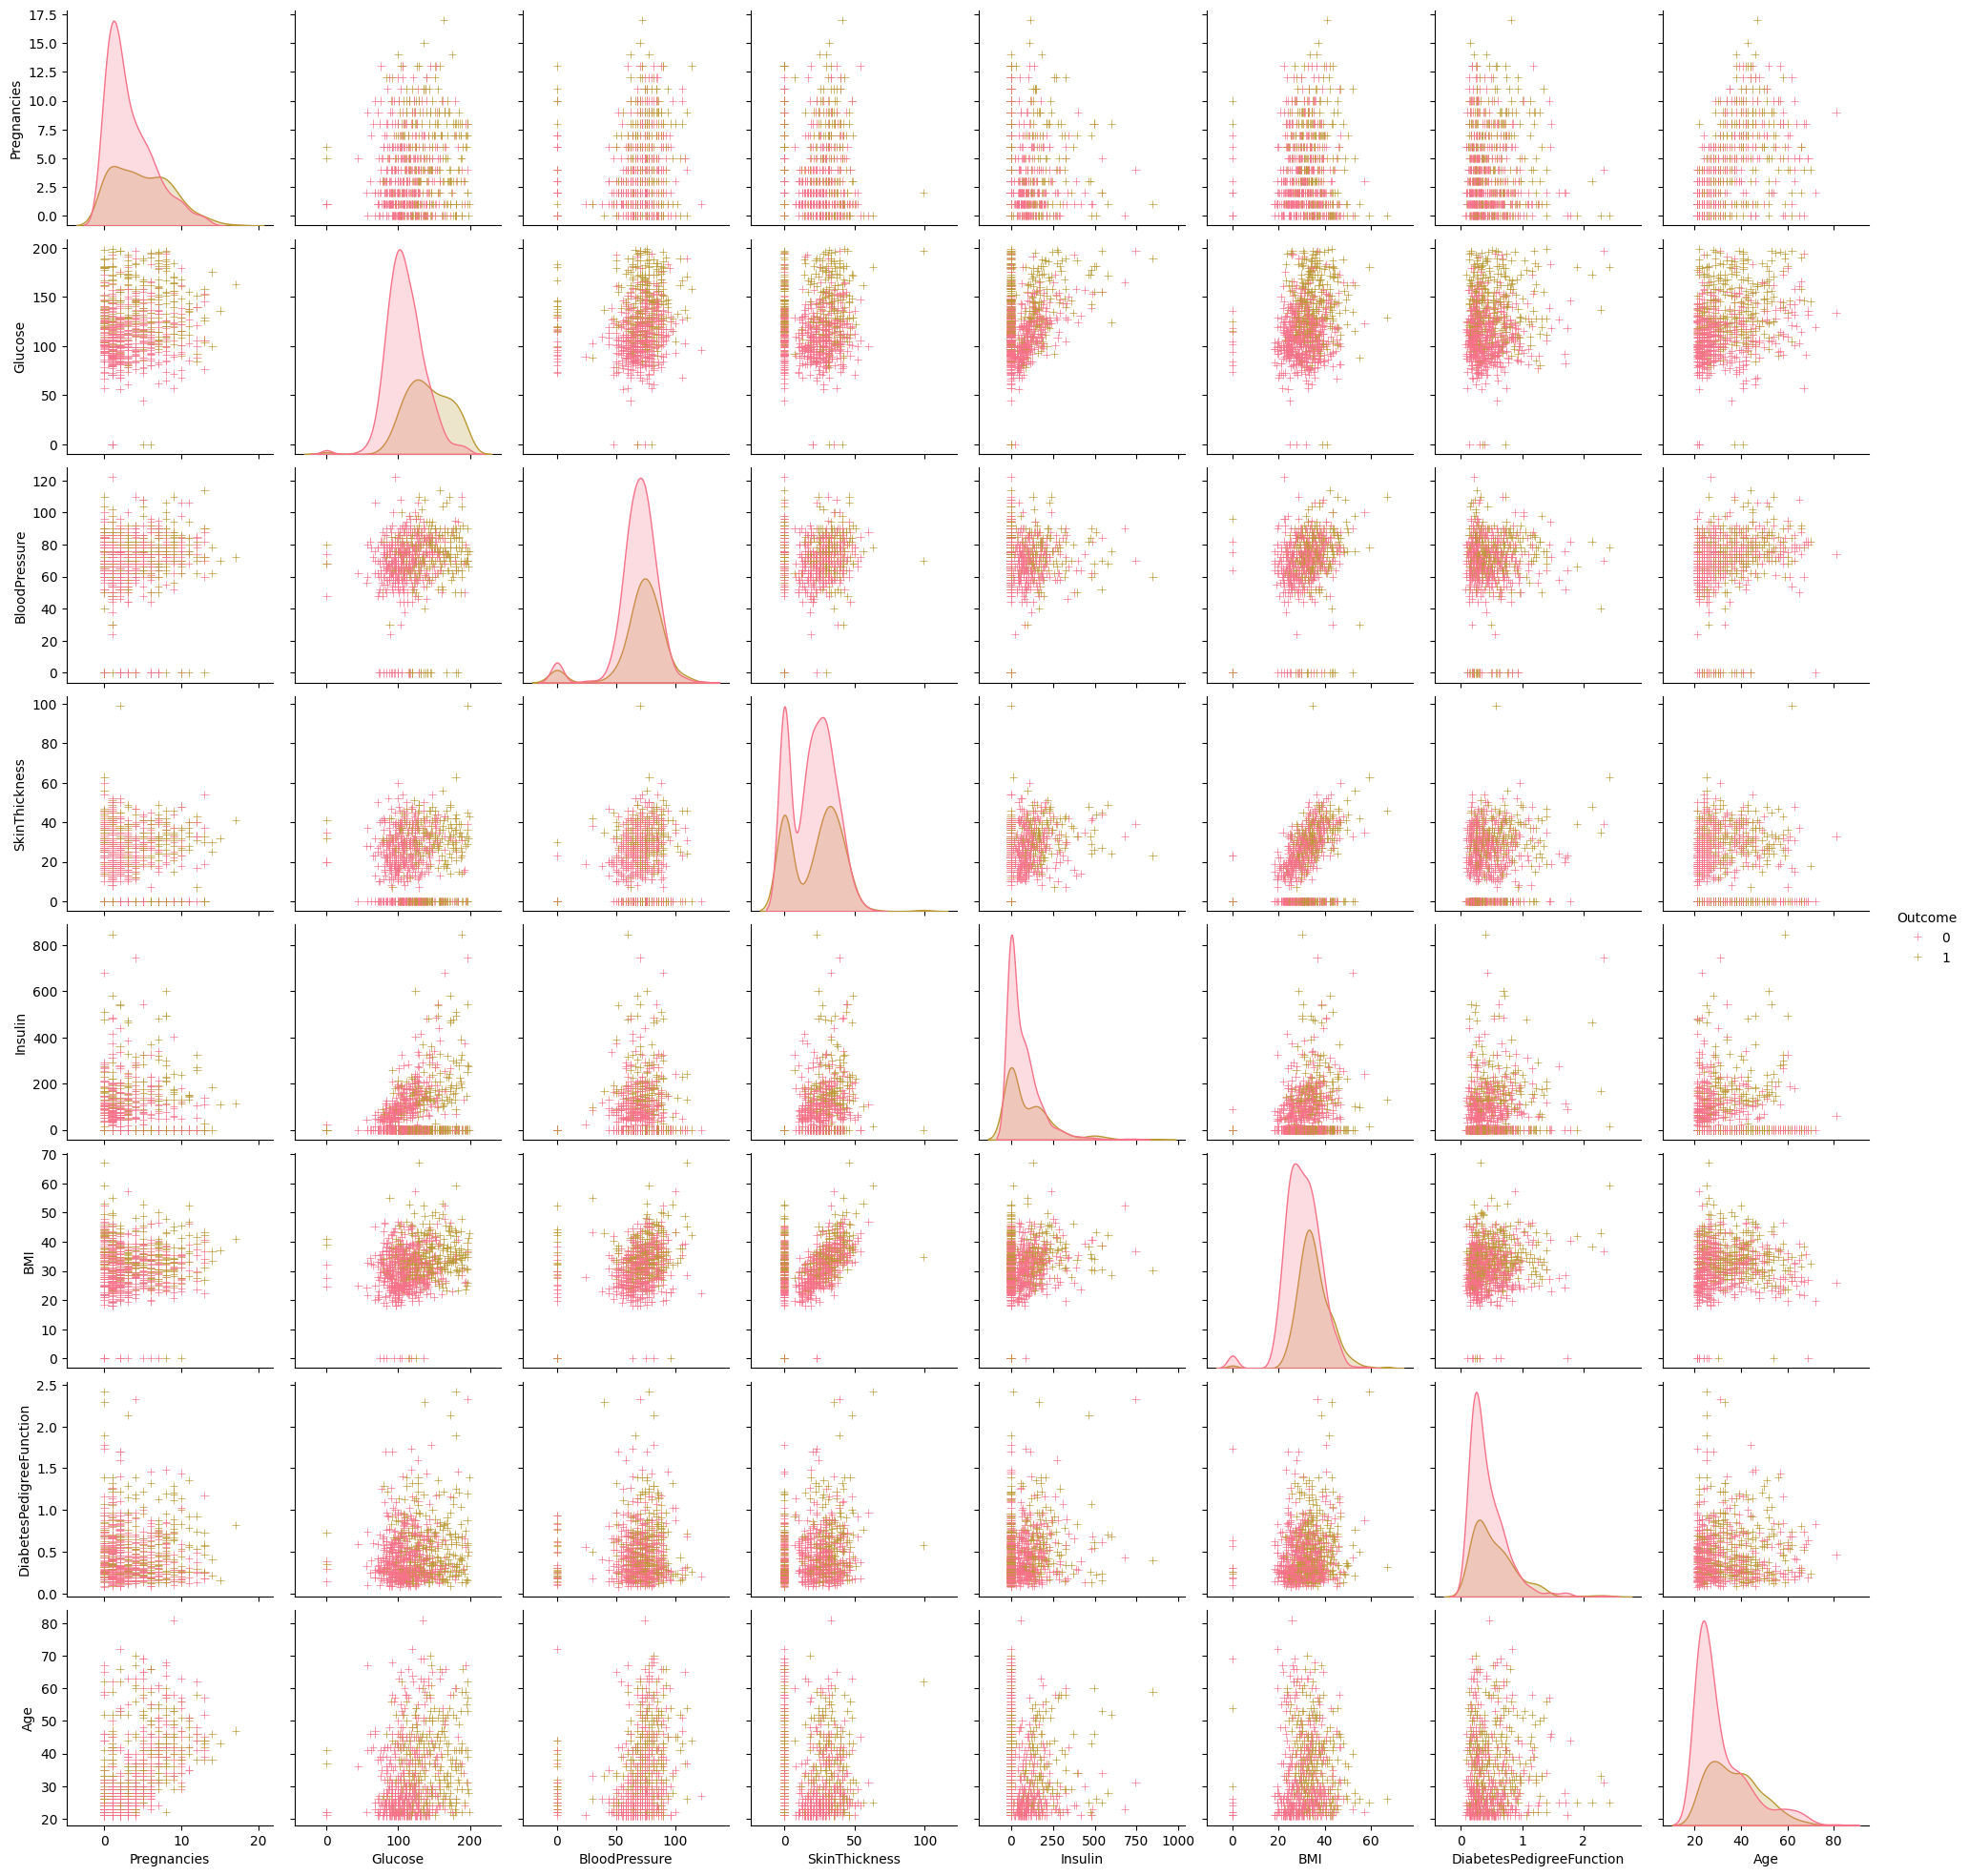

In [ ]:
sns.pairplot(dia,hue='Outcome',markers='+')
plt.show()

# **Machine Learning Model**

In [ ]:
dia['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
dia.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X=dia.drop(['Outcome'],axis=1)
y=dia['Outcome']

In [ ]:
#Data Standardization
scaler=StandardScaler()

In [ ]:
std_data=scaler.fit_transform(X)

In [ ]:
X=std_data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
#Checking for accuracy of Train data
X_train_prediction=classifier.predict(X_train)
accuracy_train=accuracy_score(X_train_prediction,y_train)
print(f"Accuracy Score for Train data: {accuracy_train*100}")

Accuracy Score for Train data: 78.66449511400651


In [ ]:
#Checking for accuracy of Test data
X_test_prediction=classifier.predict(X_test)
accuracy_test=accuracy_score(X_test_prediction,y_test)
print(f"Accuracy Score for Test Data: {accuracy_test*100}")

Accuracy Score for Test Data: 77.27272727272727


In [ ]:
#Try the model for new data
input_data=(5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

std_vals=scaler.transform(input_data_reshaped)
print(std_vals)

prediction=classifier.predict(std_vals)
print(prediction)

if prediction[0]==1:
  print('Has Diabetes')
else:
  print("You are good!")

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
Has Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
